## **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt
from scipy.fftpack import dst, idst
from skimage.metrics import peak_signal_noise_ratio

## **FEATURE EXTRACTION USING TRANSFORM METHODS**

Discrete Wavelet Transform (DWT)

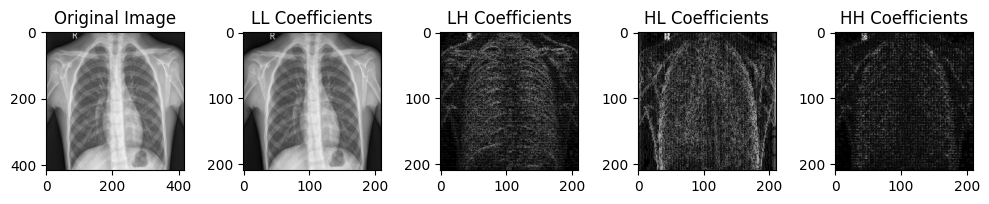

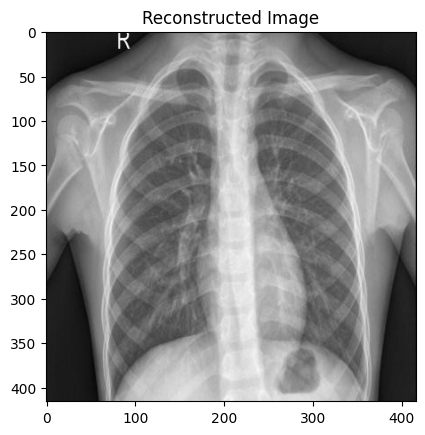

In [ ]:
# Load the X-ray image
image_path = '/IM-0001-0001_jpeg.rf.f50cf8d271cda12e85390654010d20df.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply image preprocessing (e.g., denoising, normalization)
# image = cv2.fastNlMeansDenoising(image, None, 10, 7, 21)
# image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Perform 2D Discrete Wavelet Transform (DWT) using PyWavelets
coeffs = pywt.dwt2(image, 'coif1')

# Visualize original and transformed images
plt.figure(figsize=(10, 4))

# Original Image
plt.subplot(2, 5, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# DWT Coefficients
LL, (LH, HL, HH) = coeffs
plt.subplot(2, 5, 2)
plt.imshow(LL, cmap='gray')
plt.title('LL Coefficients')

plt.subplot(2, 5, 3)
plt.imshow(np.log(np.abs(LH) + 1), cmap='gray')
plt.title('LH Coefficients')

plt.subplot(2, 5, 4)
plt.imshow(np.log(np.abs(HL) + 1), cmap='gray')
plt.title('HL Coefficients')

plt.subplot(2, 5, 5)
plt.imshow(np.log(np.abs(HH) + 1), cmap='gray')  # Apply log transformation
plt.title('HH Coefficients')

plt.tight_layout()
plt.show()

# Reconstruct image from DWT coefficients (for demonstration)
reconstructed_image = pywt.idwt2(coeffs, 'coif1')
plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

Discrete Fourier Transform(DFT)

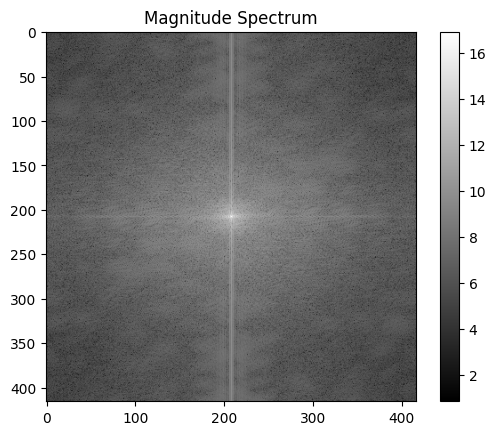

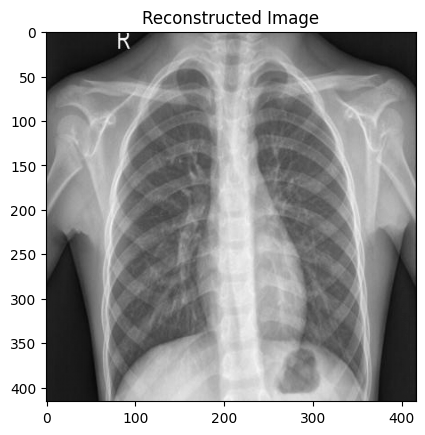

PSNR: 50.25756349268815


True

In [1]:
# Load an X-ray image from the dataset
image_path = '/content/IM-0001-0001_jpeg.rf.f50cf8d271cda12e85390654010d20df.jpg'  # Example path; change as needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Apply 2D DFT (and shift the zero frequency component to the center)
dft = np.fft.fft2(image)  # Apply 2D DFT
dft_shift = np.fft.fftshift(dft)  # Shift the zero frequency component to the center

# Compute the magnitude spectrum for visualization
magnitude_spectrum = np.log(np.abs(dft_shift) + 1)

# Plot the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.colorbar()
plt.show()

# Reconstruct the image using inverse DFT
idft_shift = np.fft.ifftshift(dft_shift)  # Shift back the zero frequency component
reconstructed_image = np.fft.ifft2(idft_shift)  # Apply inverse DFT

# Take the real part of the complex output and normalize
reconstructed_image = np.real(reconstructed_image)  # Take the real part (remove imaginary part)
reconstructed_image = cv2.normalize(reconstructed_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Plot the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.show()

# Calculate PSNR between the original and reconstructed images
psnr = peak_signal_noise_ratio(image, reconstructed_image)
print("PSNR:", psnr)
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
output_image_path = 'reconstructed_image.jpg'  # Save as a JPEG file

# Save the image
cv2.imwrite(output_image_path, reconstructed_image)

Discrete Cosine Transform(DCT)

In [ ]:
def reconstruct_image(image):
    # Apply DCT (Discrete Cosine Transform)
    transformed_image = cv2.dct(np.float32(image))

    # Apply quantization
    quantized_image = np.round(transformed_image / 10) * 10  # Adjust quantization factor as needed

    # Reconstruct using inverse DCT
    reconstructed_image = cv2.idct(quantized_image)

    # Clip values to ensure they are within valid range
    reconstructed_image = np.clip(reconstructed_image, 0, 255)

    return np.uint8(reconstructed_image)

# Load the X-ray image
image = cv2.imread('/IM-0001-0001_jpeg.rf.f50cf8d271cda12e85390654010d20df.jpg', cv2.IMREAD_GRAYSCALE)

# Reconstruct image
reconstructed_image = reconstruct_image(image)

# Save the reconstructed image
cv2.imwrite("dct_image.jpg", reconstructed_image)

# Calculate PSNR
psnr = peak_signal_noise_ratio(image, reconstructed_image)
print("PSNR:", psnr)


PSNR: 41.17566182739261


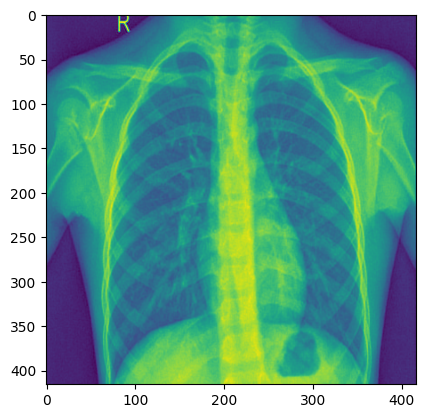

In [ ]:
img = plt. imread('/content/dct_image.jpg')
plt. imshow(img)

2D Discrete Sine Tranform (DST) on entire image

In [ ]:
# Load the X-ray image
image = cv2.imread('/IM-0001-0001_jpeg.rf.f50cf8d271cda12e85390654010d20df.jpg', cv2.IMREAD_GRAYSCALE)

# Apply DST
transformed_image = dst(dst(image, norm='ortho').T, norm='ortho').T

# Pad the transformed image back to the original size
padded_transformed_image = np.zeros_like(image)
padded_transformed_image[:transformed_image.shape[0], :transformed_image.shape[1]] = transformed_image

# Reconstruct image using IDST
reconstructed_image = idst(idst(padded_transformed_image, norm='ortho').T, norm='ortho').T

# Save the reconstructed image
cv2.imwrite("dst_image.jpg", reconstructed_image)

# Calculate reconstruction score
psnr = peak_signal_noise_ratio(image, reconstructed_image)

print("PSNR:", psnr)

PSNR: 2.1260485960051314


<ipython-input-4-8c4dc55ff0aa>:18: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(image, reconstructed_image)


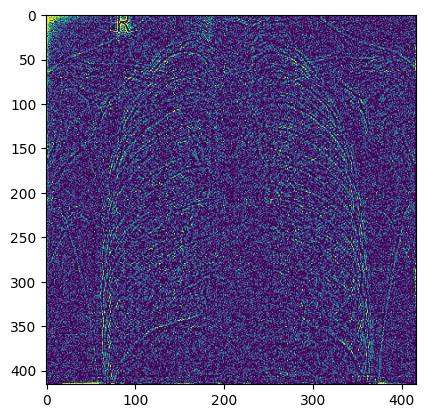

In [ ]:
img = plt. imread('/content/dst_image.jpg')
plt. imshow(img)

Dividing image into 8x8 blocks and calculating 2D Discrete Sine Tranform (DST) on each sub-block

In [ ]:
def get_8x8_blocks(image):
    n = 8
    #height, width = image.shape[:2]
    width = image.shape[0]
    height = image.shape[1]
    blocks = []

    for i in range(width // n):
        for j in range(height // n):
            xpos = i * n
            ypos = j * n
            block = np.zeros((n, n))

            for a in range(n):
                for b in range(n):
                    color = image[xpos+a, ypos+b]  # Note: OpenCV uses (y, x) order
                    block[a][b] = color - 128

            blocks.append(block)

    return blocks

# Load the image using OpenCV
image = cv2.imread("/IM-0001-0001_jpeg.rf.f50cf8d271cda12e85390654010d20df.jpg", cv2.IMREAD_GRAYSCALE)
width = image.shape[0]
height = image.shape[1]
if image is None:
    print("Error: Image not found or unable to load.")
else:
    blocks = get_8x8_blocks(image)

    # Printing the first block to verify
    print("First block:")
    print(blocks[0])


First block:
[[-103.  -98.  -95.  -97.  -98.  -97.  -97.  -99.]
 [-103.  -98.  -95.  -97.  -98.  -97.  -97.  -99.]
 [-103.  -98.  -95.  -97.  -98.  -97.  -97.  -99.]
 [-103.  -98.  -95.  -97.  -98.  -97.  -97.  -99.]
 [-103.  -98.  -95.  -97.  -98.  -97.  -97.  -99.]
 [-103.  -98.  -95.  -97.  -98.  -97.  -97.  -99.]
 [-103.  -98.  -95.  -97.  -98.  -97.  -97.  -99.]
 [-103.  -98.  -95.  -97.  -98.  -97.  -97.  -99.]]


array([[25, 30, 33, ..., 33, 30, 25],
       [25, 30, 33, ..., 33, 30, 25],
       [25, 30, 33, ..., 33, 30, 25],
       ...,
       [23, 28, 31, ..., 34, 31, 26],
       [23, 28, 31, ..., 34, 31, 26],
       [23, 28, 31, ..., 34, 31, 26]], dtype=uint8)
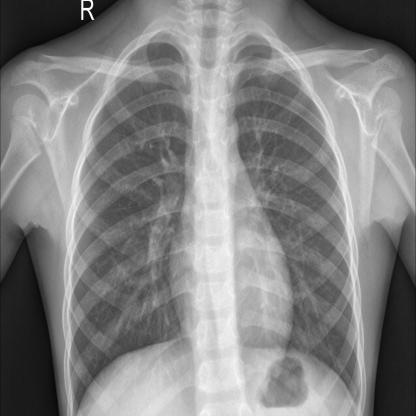

In [ ]:
image

In [ ]:
blocks[0].shape

(8, 8)

In [ ]:
def FDST(block):
    #width, height = block[0].shape[1], block[0].shape[0]
    N = 8
    q = (width // N) * (height // N)
    dst = np.zeros_like(block)

    for i in range(q):
        for u in range(N):
            #alpha_u = np.sqrt(1.0 / N) if u == N-1 else np.sqrt2.0 / N
            for v in range(N):
                alpha_u = np.sqrt(1.0 / N) if u == N-1 else np.sqrt(2.0 / N)
                alpha_v = np.sqrt(1.0 / N) if v == N-1 else np.sqrt(2.0 / N)
                sum_val = 0
                for x in range(N):
                    for y in range(N):
                        sum_val += block[i][x][y] * np.sin((np.pi * (2 * x + 1) * (u + 1)) / (2 * N)) * np.sin((np.pi * (2 * y + 1) * (v + 1)) / (2 * N))
                dst[i][u][v] = alpha_u * alpha_v * sum_val

    return dst

In [ ]:
def IDST(dst):
    #width, height = dst[0].shape[1], dst[0].shape[0]
    N = 8
    q = (width // N) * (height // N)
    idst = np.zeros_like(dst)

    for i in range(q):
        for x in range(N):
            for y in range(N):
                sum_val = 0
                for u in range(N):
                    for v in range(N):
                        alpha_u = np.sqrt(1.0 / N) if u == N-1 else np.sqrt(2.0 / N)
                        alpha_v = np.sqrt(1.0 / N) if v == N-1 else np.sqrt(2.0 / N)
                        sum_val += alpha_u * alpha_v * dst[i][u][v] * np.sin((np.pi * (2 * x + 1) * (u + 1)) / (2 * N)) * np.sin((np.pi * (2 * y + 1) * (v + 1)) / (2 * N))
                idst[i][x][y] = sum_val

    return idst


# Applying FDST
dst_block = FDST(blocks)

# Applying IDST
reconstructed_block = IDST(dst_block)

# Printing to verify
print("Original block:")
print(blocks)
print("\nReconstructed block:")
print(reconstructed_block)


Streaming output truncated to the last 5000 lines.
       [-24., -30., -34., -36., -37., -36., -28., -19.],
       [-25., -30., -34., -37., -41., -41., -30., -17.],
       [-27., -30., -33., -38., -44., -44., -31., -17.],
       [-29., -30., -32., -36., -42., -44., -33., -20.],
       [-30., -32., -32., -33., -38., -40., -35., -25.],
       [-32., -33., -31., -29., -32., -36., -35., -31.],
       [-32., -34., -31., -27., -27., -33., -36., -35.]]), array([[-12.,  -9.,  -2.,   3.,   2.,   0.,   6.,  14.],
       [-14., -10.,  -3.,   3.,   3.,   1.,   5.,  13.],
       [-17., -12.,  -3.,   4.,   4.,   1.,   5.,  12.],
       [-18., -13.,  -3.,   4.,   4.,   0.,   3.,  10.],
       [-18., -13.,  -3.,   4.,   3.,  -1.,   1.,   8.],
       [-16., -11.,  -3.,   2.,   1.,  -3.,  -1.,   6.],
       [-13., -10.,  -3.,   1.,  -2.,  -6.,  -2.,   5.],
       [-11.,  -8.,  -3.,   0.,  -3.,  -7.,  -3.,   4.]]), array([[19., 26., 34., 38., 38., 41., 46., 51.],
       [17., 24., 32., 36., 37., 39., 44.

In [ ]:
reconstructed_block[0]

array([[-128.     , -128.     , -128.     , -128.     , -127.     ,
        -126.     , -125.     , -124.     ],
       [-128.     , -127.     , -127.     , -126.     , -125.     ,
        -123.     , -122.     , -121.     ],
       [-123.     , -122.     , -121.     , -119.     , -117.     ,
        -115.     , -113.     , -112.     ],
       [-114.     , -113.     , -110.     , -107.00001, -104.00001,
        -102.     , -100.     , -100.     ],
       [-107.     , -105.     , -101.     ,  -98.     ,  -94.     ,
         -92.     ,  -91.     ,  -90.     ],
       [-102.     , -100.     ,  -95.99999,  -92.     ,  -88.     ,
         -85.99999,  -85.     ,  -85.     ],
       [ -96.     ,  -94.     ,  -90.     ,  -86.     ,  -82.     ,
         -81.     ,  -80.     ,  -80.     ],
       [ -91.     ,  -89.     ,  -84.     ,  -80.     ,  -77.     ,
         -76.     ,  -76.     ,  -76.     ]], dtype=float32)

In [ ]:
import numpy as np
import cv2

def get_image(idst):
    n = 8
    k = 0
    #width, height = idst.shape[1] * n, idst.shape[0] * n
    image = np.zeros((height, width))

    for i in range(width):
        for j in range(height):
            xpos = i
            ypos = j
            for a in range(n):
                for b in range(n):
                    try:
                      color = int(idst[k][a][b])
                    except IndexError:
                      continue
                    # print(xpos+a)
                    # print(ypos+b)
                    #print(color+128)
                    try:
                      image[xpos+a][ypos+b] = color + 128
                    except IndexError:
                      continue

            k=k+1

    return image

# Getting the reconstructed image
reconstructed_image = get_image(reconstructed_block)


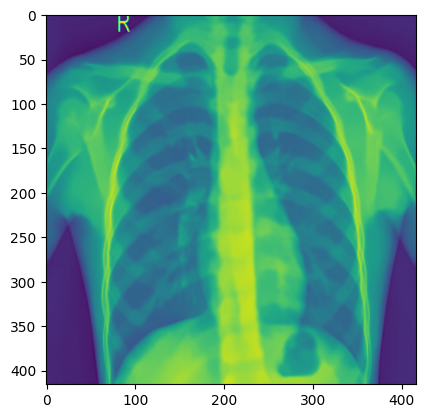

In [ ]:
img = plt. imread('/content/reconstructed_image.jpg')
plt. imshow(img)